In [5]:
from bs4 import BeautifulSoup
import requests

In [6]:
url='https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
page=requests.get(url)

soup=BeautifulSoup(page.text,'html')

In [7]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-

In [8]:
soup.find('table',class_='wikitable sortable')

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [9]:
table=soup.find_all('table')[0]

In [10]:
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [11]:
world_titles=table.find_all('th')

In [12]:
world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [13]:
world_table_titles=[title.text.strip() for title in world_titles]
print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [14]:
import pandas as pd

In [15]:
df=pd.DataFrame(columns=world_table_titles )
df


,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [16]:
column_data=table.find_all('tr')


In [17]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data=[data.text.strip() for data in row_data]
    print(individual_row_data)
    
    
    length=len(df)
    df.loc[length] = individual_row_data

['1', 'Walmart', 'Retail', '648,125', '6.0%', '2,100,000', 'Bentonville, Arkansas']
['2', 'Amazon', 'Retail and cloud computing', '574,785', '11.9%', '1,525,000', 'Seattle, Washington']
['3', 'Apple', 'Electronics industry', '383,482', '-2.8%', '161,000', 'Cupertino, California']
['4', 'UnitedHealth Group', 'Healthcare', '371,622', '14.6%', '440,000', 'Minnetonka, Minnesota']
['5', 'Berkshire Hathaway', 'Conglomerate', '364,482', '20.7%', '396,500', 'Omaha, Nebraska']
['6', 'CVS Health', 'Healthcare', '357,776', '10.9%', '259,500', 'Woonsocket, Rhode Island']
['7', 'ExxonMobil', 'Petroleum industry', '344,582', '-16.7%', '61,500', 'Spring, Texas']
['8', 'Alphabet', 'Technology and cloud computing', '307,394', '8.7%', '182,502', 'Mountain View, California']
['9', 'McKesson Corporation', 'Health', '276,711', '4.8%', '48,000', 'Irving, Texas']
['10', 'Cencora', 'Pharmacy wholesale', '262,173', '9.9%', '44,000', 'Conshohocken, Pennsylvania']
['11', 'Costco', 'Retail', '242,290', '6.8%', '3

In [18]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [72]:
df.to_csv(r'C:/Users/faru0/OneDrive/Desktop/Projects/Web Scraping/Companies.csv',index=False)

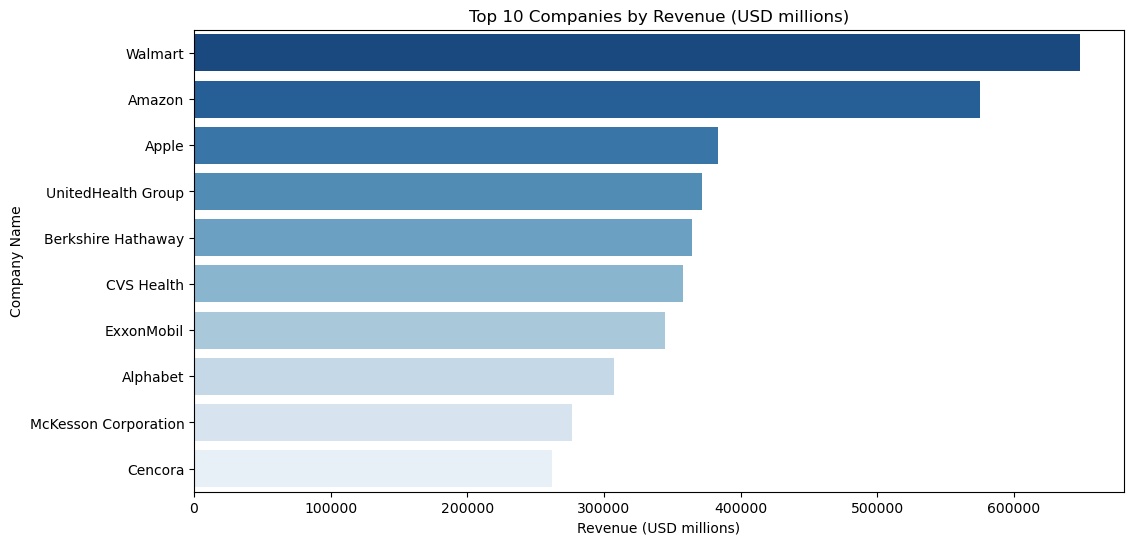

In [30]:
import matplotlib.pyplot as plt

# Convert the 'Revenue (USD millions)' column to numeric, forcing errors to NaNs
df['Revenue (USD millions)'] = pd.to_numeric(
    df['Revenue (USD millions)'].replace('[\$,]', '', regex=True),
    errors='coerce'
)

# Drop any rows where 'Revenue (USD millions)' couldn't be converted to numeric
df.dropna(subset=['Revenue (USD millions)'], inplace=True)

# Ensure the column is of type float
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].astype(float)

# Proceed with creating the top 10 companies by revenue plot
top_10_revenue = df.nlargest(10, 'Revenue (USD millions)')


import matplotlib.pyplot as plt
import seaborn as sns



# Plot for Top 10 Companies by Revenue
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_revenue,
    x='Revenue (USD millions)',
    y='Name',
    palette='Blues_r'
)
plt.title('Top 10 Companies by Revenue (USD millions)')
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Company Name')
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    object 
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    float64
 4   Revenue growth          100 non-null    object 
 5   Employees               100 non-null    object 
 6   Headquarters            100 non-null    object 
dtypes: float64(1), object(6)
memory usage: 6.2+ KB


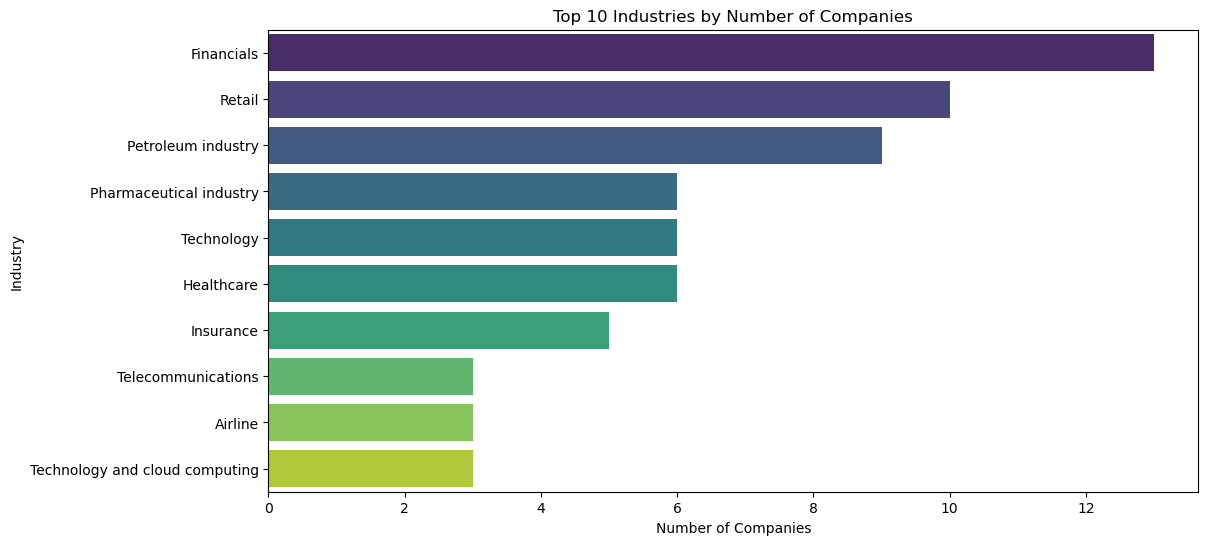

In [31]:
industry_counts = df['Industry'].value_counts().head(10)  # Top 10 industries for clarity

plt.figure(figsize=(12, 6))
sns.barplot(
    x=industry_counts.values,
    y=industry_counts.index,
    palette='viridis'
)
plt.title('Top 10 Industries by Number of Companies')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.show()


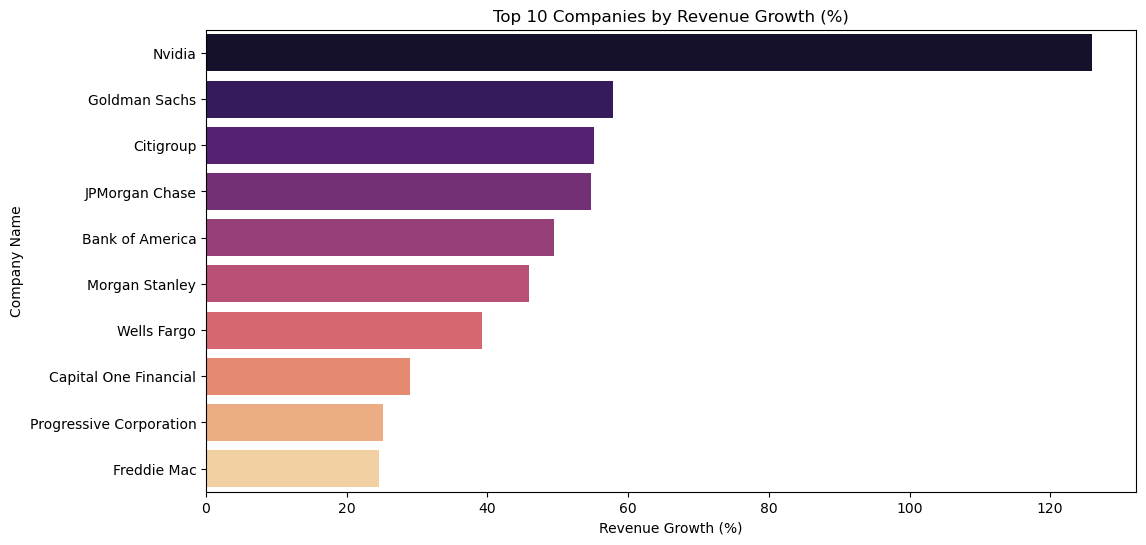

In [32]:
df['Revenue growth'] = df['Revenue growth'].str.rstrip('%').astype(float)
top_10_growth = df.nlargest(10, 'Revenue growth')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_growth,
    x='Revenue growth',
    y='Name',
    palette='magma'
)
plt.title('Top 10 Companies by Revenue Growth (%)')
plt.xlabel('Revenue Growth (%)')
plt.ylabel('Company Name')
plt.show()

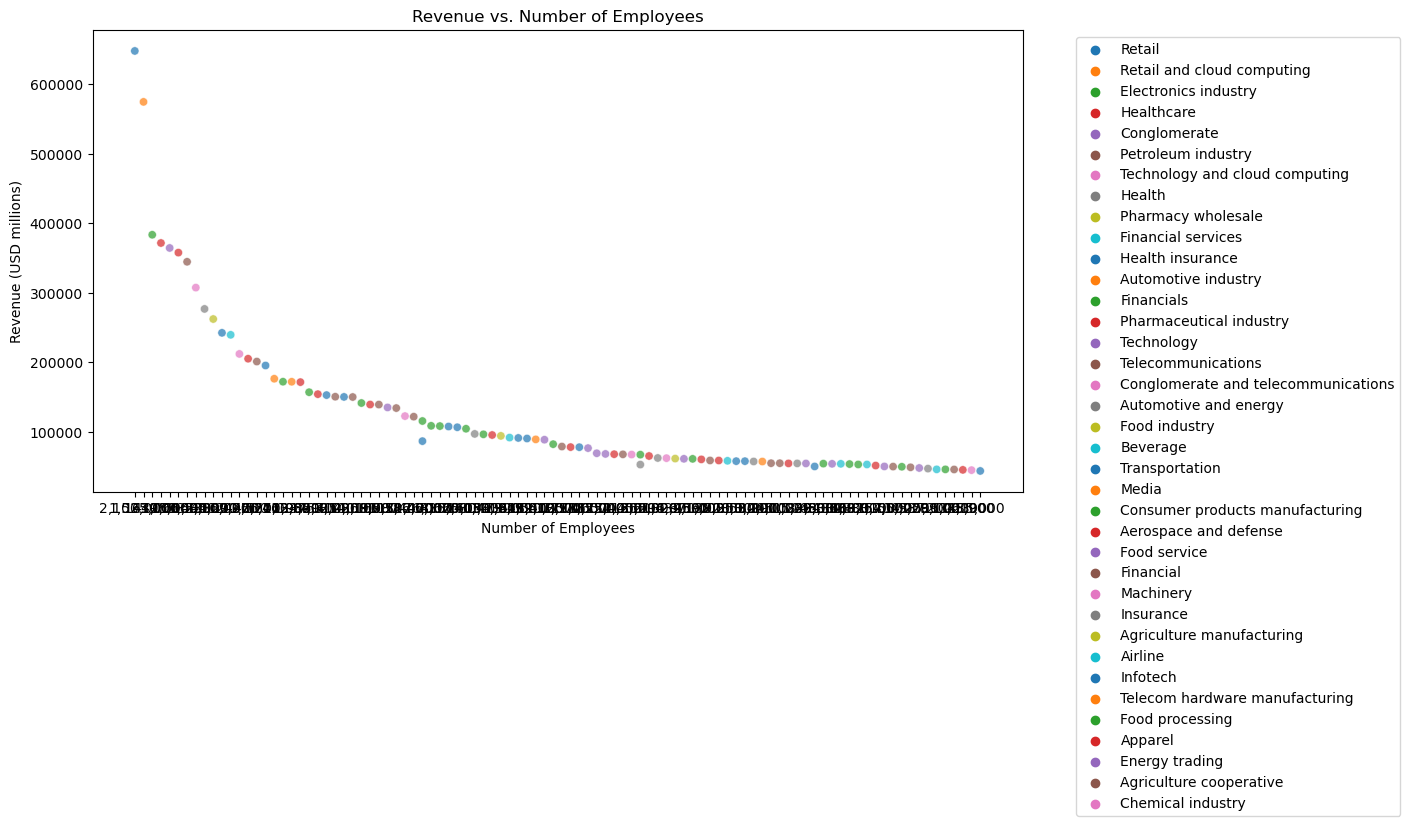

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='Employees',
    y='Revenue (USD millions)',
    hue='Industry',
    palette='tab10',
    alpha=0.7
)
plt.title('Revenue vs. Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Revenue (USD millions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

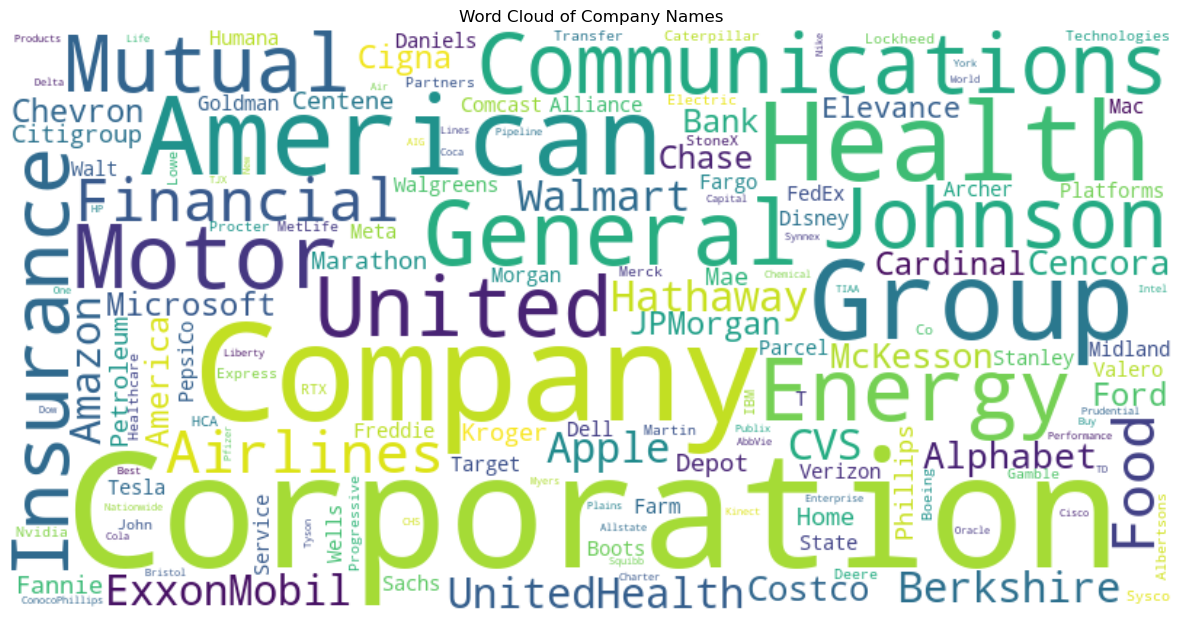

In [36]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Name']))
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Company Names')
plt.show()

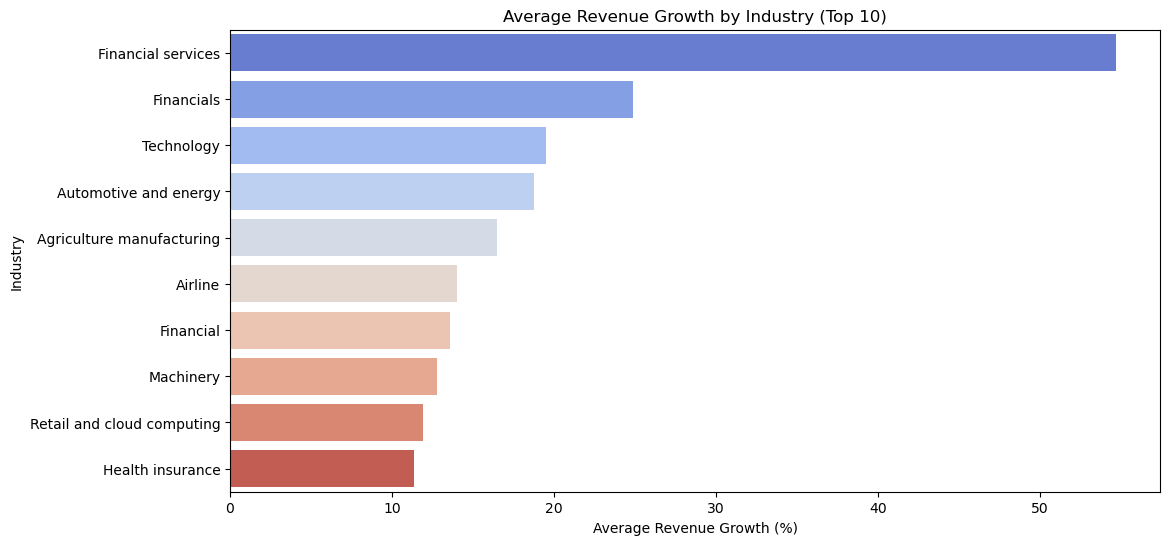

In [37]:
industry_growth = df.groupby('Industry')['Revenue growth'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=industry_growth.values,
    y=industry_growth.index,
    palette='coolwarm'
)
plt.title('Average Revenue Growth by Industry (Top 10)')
plt.xlabel('Average Revenue Growth (%)')
plt.ylabel('Industry')
plt.show()

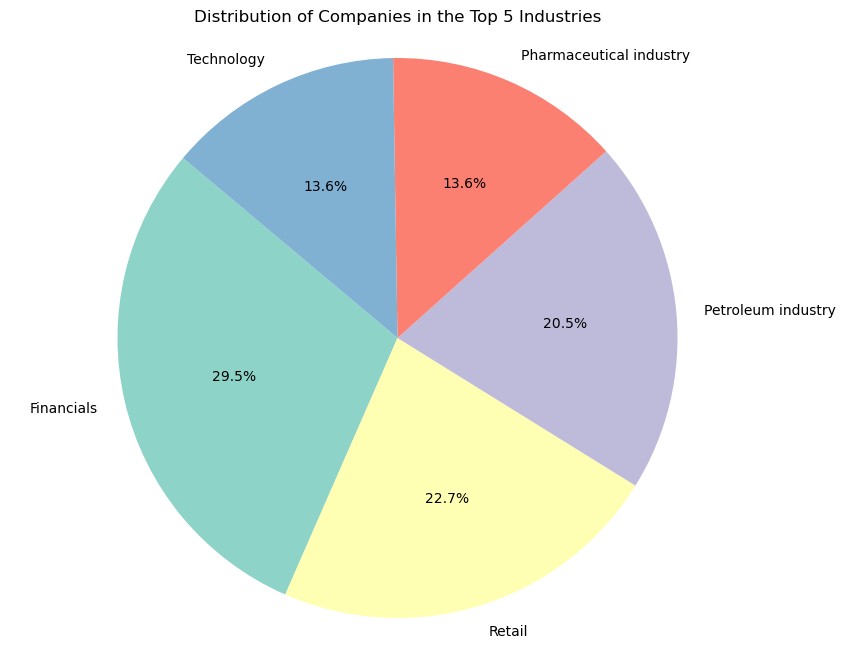

In [39]:
top_5_industries = df['Industry'].value_counts().head(5)

# Plot a pie chart for the top 5 industries
plt.figure(figsize=(10, 8))
plt.pie(
    top_5_industries,
    labels=top_5_industries.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set3')
)
plt.title('Distribution of Companies in the Top 5 Industries')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()